In [1]:
import meep as mp
from meep import mpb

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [2]:
import sys
sys.path.append("/home/ben/Desktop/Thesis/github/Thesis_name/Simulations/")
from ExternalFunctions import (calculate_ifield, plot_field_2D_YZ,  plot_field_2D_XZ,
                              plot_field_2D_XY, plot_intentsity_in_z_axis )

In [3]:
save = True
plot = True
simulate = False

In [4]:
resolution = 32
num_bands = 4

a = 290 # nm
r = 103 / a 
t = 200 / a

sx = 1 
sy = 1 
sz = 10 
cell = mp.Vector3(sx, sy, sz)
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1, sz))

geometry = [mp.Block(center=mp.Vector3(0,0,0), size=mp.Vector3(mp.inf,mp.inf,t), material=mp.Medium(index = 1.9935))]
geometry.append(mp.Cylinder(radius=r, height = t, material=mp.Medium(epsilon=1)))

In [5]:
num_period = 3
k_point = mp.Vector3(0.5,0.0,0.0)

sim_params = geometry_lattice,  k_point, geometry, resolution, num_bands

field, converted_eps = calculate_ifield(sim_params, num_period)

Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 32 x 32 x 320.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 10)
Cell volume = 10
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 0.1)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,1e+20,0.689655)
          axes (1,0,0), (0,1,0), (0,0,1)
     cylinder, center = (0,0,0)
          radius 0.355172, height 0.689655, axis (0, 0, 1)
Geometric object tree has depth 1 and 10 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
1 k-points
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.48360681533813477
solve_kpoint (0.5,0,0):
Solving for bands 1 to 4...
Finished solving for bands 1 to 4 after 14 iterations.
freqs:, 1, 0.5, 0, 

(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:title={'center':'YZ projection of I field'}, xlabel='Z distance (nm)', ylabel='Y distance (nm)'>)

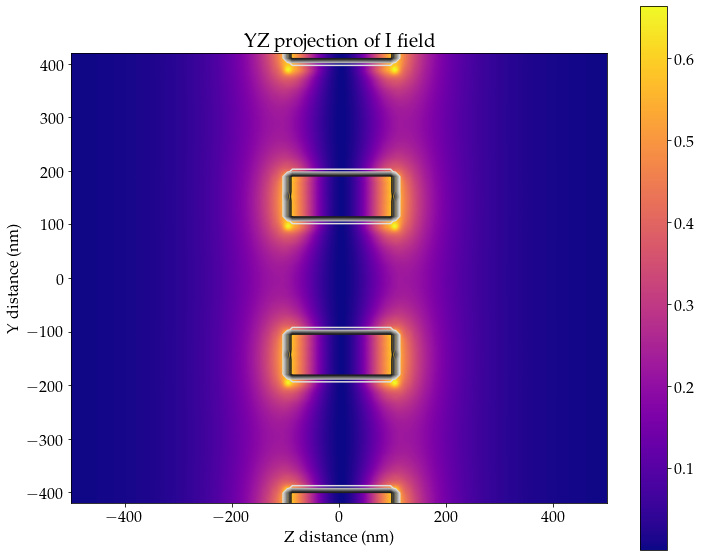

In [6]:
eps = converted_eps.T
a = 290  # nanometers
num_band = 1


ylim = [-420,420]
zlim = [-500,500]
title = 'YZ projection of I field'

plot_field_2D_YZ(eps, np.array(field), a, resolution, num_band, ylim, zlim, title)

4 92 4 92


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:title={'center':'XY projection of I field'}, xlabel='X distance (nm)', ylabel='Y distance (nm)'>)

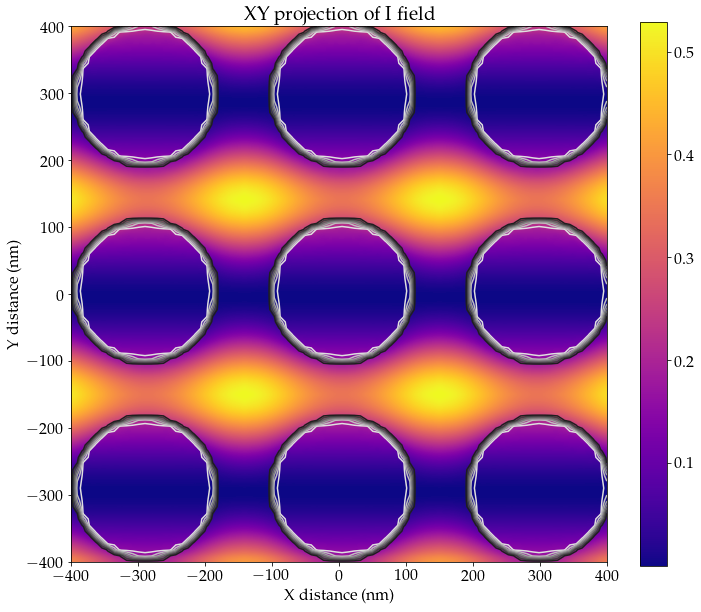

In [7]:
xlim = [-400,400]
ylim = [-400,400]
title = 'XY projection of I field'

plot_field_2D_XY(eps, np.array(field), a, resolution, num_band, xlim, ylim, title)

(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:title={'center':'XZ projection of I field'}, xlabel='Z distance (nm)', ylabel='X distance (nm)'>)

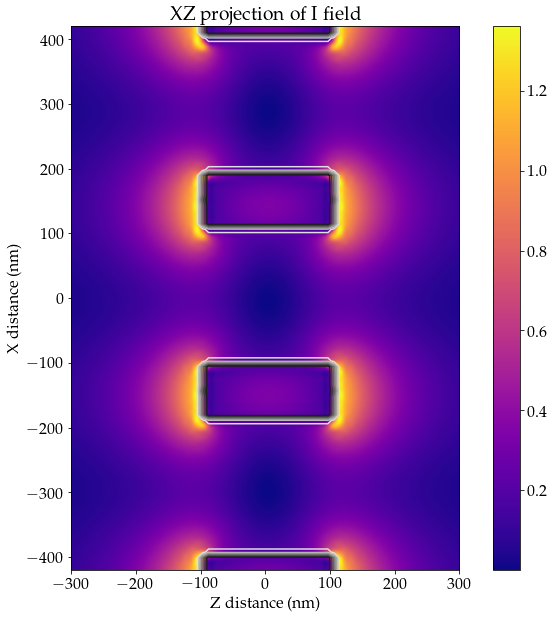

In [8]:
xlim = [-420,420]
zlim = [-300,300]
title = 'XZ projection of I field'

plot_field_2D_XZ(eps, np.array(field), a, resolution, num_band, xlim, zlim, title)

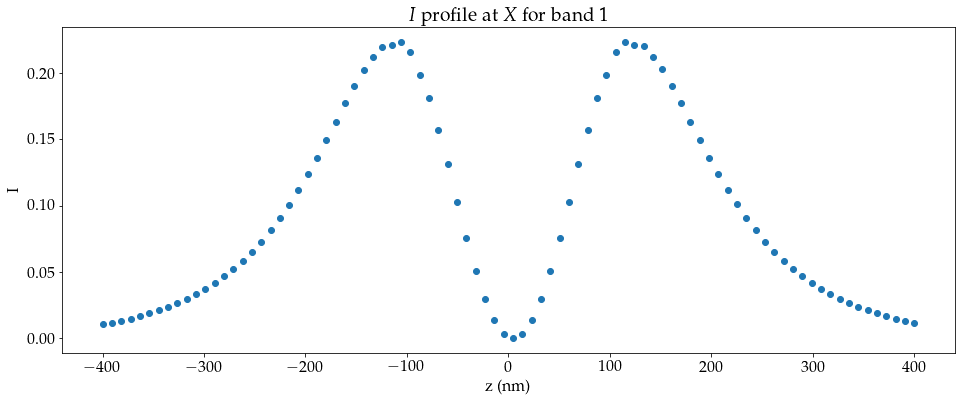

In [9]:
title = '$I$ profile at $X$ for band 1'
zlim = [-400,400]
num_band = 1

fig, ax = plot_intentsity_in_z_axis(field, a, resolution, num_band,zlim, title)